In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap  
from sklearn.model_selection import RepeatedStratifiedKFold
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv("data.csv")

In [23]:
df.head()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [24]:
# The dataframe with our features only (picked 13 columns out of 15) to draw the heatmap
features_df = df.drop('Unnamed: 0', axis=1)
features_df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


# KNN Model

KNN Pre-Validation classifier results:
Accuracy: 0.9384615384615385
Precision: 1.0
F1 score: 0.5
Recall: 0.3333333333333333
ROC score: 0.6666666666666666
 
Testing 1:
Accuracy: 0.9490740740740741
Precision: 1.0
F1 score: 0.7659574468085107
Recall: 0.6206896551724138
ROC score: 0.8103448275862069
------------------------------------------------------------------------------


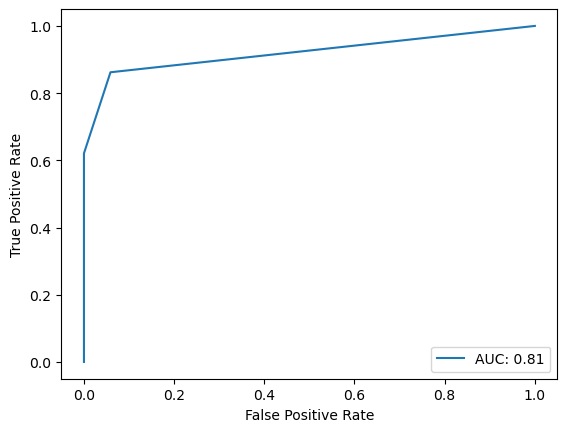

In [25]:
x = df.iloc[:, 1:14].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=200)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size=0.30, random_state=200)

knn = KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='uniform')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)

# Validation
print("KNN Pre-Validation classifier results:")
print("Accuracy:", metrics.accuracy_score(y_val, y_pred))
print("Precision:", metrics.precision_score(y_val, y_pred))
print("F1 score:", metrics.f1_score(y_val, y_pred))
print("Recall:", metrics.recall_score(y_val, y_pred))
print("ROC score:", metrics.roc_auc_score(y_val, y_pred))

# Testing
y_pred2 = knn.predict(x_test)


print(" ")
print("Testing 1:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred2))
print("Precision:", metrics.precision_score(y_test, y_pred2))
print("F1 score:", metrics.f1_score(y_test, y_pred2))
print("Recall:", metrics.recall_score(y_test, y_pred2))
print("ROC score:", metrics.roc_auc_score(y_test, y_pred2))
print("------------------------------------------------------------------------------")


# ROC/AUC Curves

y_pred_proba = knn.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)


plt.plot(fpr, tpr, label="AUC: " + str(round(metrics.roc_auc_score(y_test, y_pred2),3)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Hyperparameters tunning

In [26]:
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best using %s" % (grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best using {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.912882 (0.040645) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.912882 (0.040645) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.929147 (0.032126) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.930612 (0.031814) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.912963 (0.029198) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.923285 (0.025515) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.904847 (0.032549) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.915169 (0.029873) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.901884 (0.031747) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.907746 (0.029994) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.912254 (0.031030)

KNN Post-Tuning classifier results:
Accuracy: 0.958974358974359
Precision: 0.8571428571428571
F1 score: 0.75
Recall: 0.6666666666666666
ROC score: 0.827683615819209
 
Testing 2:
Accuracy: 0.9398148148148148
Precision: 0.7666666666666667
F1 score: 0.7796610169491527
Recall: 0.7931034482758621
ROC score: 0.877835146597824
-----------------------------------------------------------------------------------


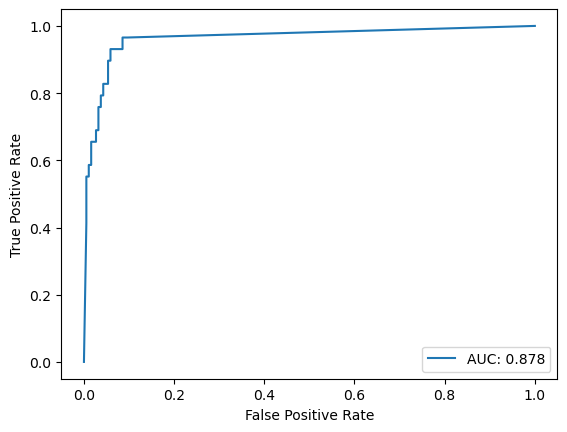

In [27]:
knn2 = KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')
knn2.fit(x_train, y_train)
y_pred3 = knn2.predict(x_val)

print("KNN Post-Tuning classifier results:")
print("Accuracy:", metrics.accuracy_score(y_val, y_pred3))
print("Precision:", metrics.precision_score(y_val, y_pred3))
print("F1 score:", metrics.f1_score(y_val, y_pred3))
print("Recall:", metrics.recall_score(y_val, y_pred3))
print("ROC score:", metrics.roc_auc_score(y_val, y_pred3))

# Testing
y_pred4 = knn2.predict(x_test)

print(" ")
print("Testing 2:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred4))
print("Precision:", metrics.precision_score(y_test, y_pred4))
print("F1 score:", metrics.f1_score(y_test, y_pred4))
print("Recall:", metrics.recall_score(y_test, y_pred4))
print("ROC score:", metrics.roc_auc_score(y_test, y_pred4))
print("-----------------------------------------------------------------------------------")

y_pred_proba2 = knn2.predict_proba(x_test)[::, 1]
fpr2, tpr2, _2 = metrics.roc_curve(y_test, y_pred_proba2)
plt.plot(fpr2, tpr2, label="AUC: " + str(round(metrics.roc_auc_score(y_test, y_pred4),3)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Performance Comparison

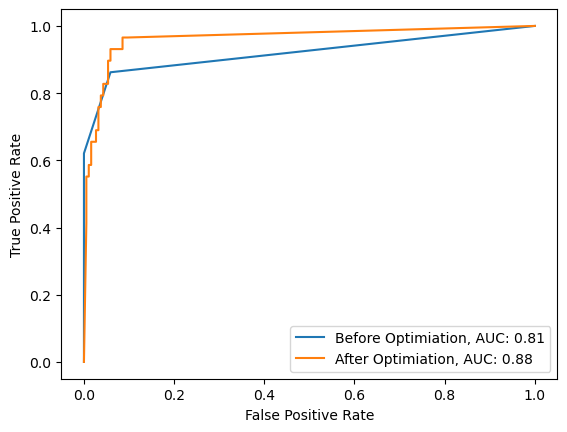

In [28]:
plt.plot(fpr, tpr, label="Before Optimiation, AUC: " + str(round(metrics.roc_auc_score(y_test, y_pred2),2)))
plt.plot(fpr2, tpr2, label="After Optimiation, AUC: " +str(round(metrics.roc_auc_score(y_test, y_pred4),2)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Accuracy Change

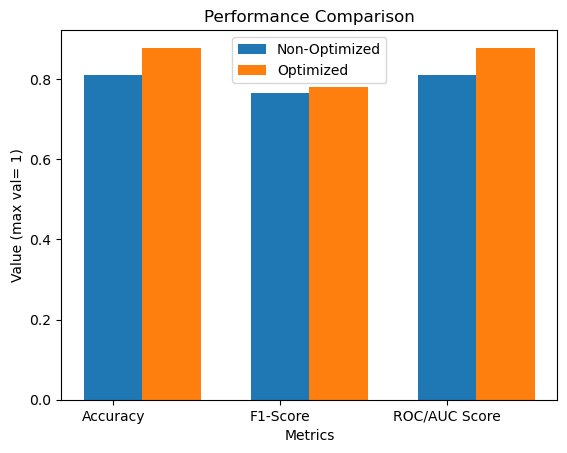

In [29]:
initACC =  metrics.roc_auc_score(y_test, y_pred2)
finalACC = metrics.roc_auc_score(y_test, y_pred4)

initF1 =  metrics.f1_score(y_test, y_pred2)
finalF1 = metrics.f1_score(y_test, y_pred4)

initROC = metrics.roc_auc_score(y_test, y_pred2)
finalROC = metrics.roc_auc_score(y_test, y_pred4)

data1 = np.array([finalACC, finalF1, finalROC])
data2 = np.array([initACC,initF1, initROC])

# Set the width of the bars
bar_width = 0.35

# Create a figure with a single subplot
fig, ax = plt.subplots()

# Plot the first set of bars
ax.bar(np.arange(len(data1)), data2, bar_width, label='Non-Optimized')

# Plot the second set of bars
ax.bar(np.arange(len(data2)) + bar_width, data1, bar_width, label='Optimized')

# Set the x-tick labels
ax.set_xticks(np.arange(len(data1)))
ax.set_xticklabels(['Accuracy', 'F1-Score', 'ROC/AUC Score'])

# Add a legend
ax.legend()

# Set the axis labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Value (max val= 1)')
ax.set_title('Performance Comparison')

# Show the plot
plt.show()